In [1]:
import pandas as pd
import numpy as np


In [2]:
# Make a dataFrame from the Income per Capita Excel file.
# Note that hhe file needs to be in the same folder as this python file)
ipc = pd.read_excel("income_per_capita.xlsx", "Sheet1",
                    index_col=0, na_values=['NA'])


In [3]:
# Make a dataFrame from Total Import from China to US Excel file
totalImp = pd.read_excel("total_import_from_china_to_US.xlsx",
                         "Sheet1", index_col=0, na_values=['NA'])

In [4]:
# Make a dataFrame from China Applied Simple Mean Tariff Excel file
chn = pd.read_excel("china_applied_simple_mean_tariff.xlsx", 
                    "CleanedUp", index_col=0, na_values=['NA'])

# Note than this file contains missing data (years 1995, 2012, 2013, 2018), 
# but it is coded as 'NaN' which is different from null. It's all good.  

In [5]:
# Merging ipc and totalImp dataFrames (Can merge two dataFrames at a time)
temp = pd.merge(ipc,totalImp, on="Year")

In [6]:
# Mearging merged and chn dataFrames
merged = pd.merge(temp, chn, on="Year")

In [7]:
merged
# Notice that years are ranged from 2005 to 2017

,Population,CurrentDollar,2017Dollar,TotalImportUSD,Tariff
Year,,,,,
2017,323156000,34489,34489,505470000000,8.46
2016,320372000,33205,33919,462542000000,7.88
2015,318868000,31653,32751,483201700000,7.82
2014,316168000,30176,31276,468474900000,7.74
2013,313443000,30027,31649,440430000000,NaN
2012,311116000,28281,30250,425619100000,NaN
2011,308827000,27554,30097,399371200000,8.13
2010,306553000,26558,29923,364952600000,8.09
2009,304280000,26530,30385,296373900000,8.09


In [8]:
merged.dtypes
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 2017 to 1992
Data columns (total 5 columns):
Population        26 non-null int64
CurrentDollar     26 non-null int64
2017Dollar        26 non-null int64
TotalImportUSD    26 non-null int64
Tariff            23 non-null float64
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


In [9]:
# Simple descriptive statistics (13 columns, mean tariff is 8.36, etc. )
merged.describe()

,Population,CurrentDollar,2017Dollar,TotalImportUSD,Tariff
count,2.600000e+01,26.000000,26.000000,2.600000e+01,23.000000
mean,2.910940e+08,24303.653846,30533.153846,2.354664e+11,14.723478
std,2.072899e+07,5407.434637,2124.291142,1.694249e+11,9.615864
min,2.568300e+08,14847.000000,25498.000000,2.572750e+10,7.740000
25%,2.730082e+08,20399.750000,29966.500000,7.382350e+10,8.295000
50%,2.925000e+08,24446.500000,31067.000000,2.200760e+11,9.810000
75%,3.082585e+08,27406.500000,31699.250000,3.907666e+11,16.530000
max,3.231560e+08,34489.000000,34489.000000,5.054700e+11,39.710000


In [10]:
# Testing using the scatter plot. 
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(merged.iloc[:,1:]) 
plt.show()
# Looking at all data, you can see Tariff is negatively correlated. 
# So as in the professor's example for scorepress, 
# Tariff might need to be reversed

<Figure size 640x480 with 16 Axes>

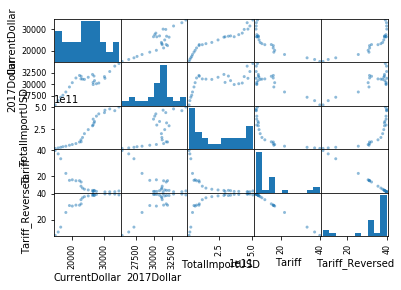

In [11]:
# Using Professor's reversing function to reverse Tariff to see a difference
# However I want to put that reversed value in a new column so creating a new column 
# on the dataFrame


#### creating reversing function:  [Prof M's work]
def reverse(aColumn):
    return max(aColumn) - aColumn + min(aColumn)   # I see what he did!

# Making a new column to put reversed Tariff data; and using 
# reverse function 
merged['Tariff_Reversed'] = reverse(merged.Tariff)

pd.plotting.scatter_matrix(merged.iloc[:,1:])
plt.show()

In [12]:
# Following renaming method that Professor used.

merged.columns  # Check current column names

#newNames 
newNames=['populationUS', 'medianIncomeCurrentDollar',
          'medianIncomeIn2017Dollar', 'totalImportInUSD', 
          'tariffPercentage', 'reversedTariff']
## creating map
nameChanges={old:new for old,new in zip(merged.columns,newNames)}

nameChanges  # Check the changes in column names

{'Population': 'populationUS',
 'CurrentDollar': 'medianIncomeCurrentDollar',
 '2017Dollar': 'medianIncomeIn2017Dollar',
 'TotalImportUSD': 'totalImportInUSD',
 'Tariff': 'tariffPercentage',
 'Tariff_Reversed': 'reversedTariff'}

In [13]:
# Change the column names to new names
merged.rename(nameChanges,axis=1,inplace=True)

merged  # Checking

,populationUS,medianIncomeCurrentDollar,medianIncomeIn2017Dollar,totalImportInUSD,tariffPercentage,reversedTariff
Year,,,,,,
2017,323156000,34489,34489,505470000000,8.46,38.99
2016,320372000,33205,33919,462542000000,7.88,39.57
2015,318868000,31653,32751,483201700000,7.82,39.63
2014,316168000,30176,31276,468474900000,7.74,39.71
2013,313443000,30027,31649,440430000000,NaN,NaN
2012,311116000,28281,30250,425619100000,NaN,NaN
2011,308827000,27554,30097,399371200000,8.13,39.32
2010,306553000,26558,29923,364952600000,8.09,39.36
2009,304280000,26530,30385,296373900000,8.09,39.36


In [14]:
# Now save as a csv format to use in R
merged.to_csv("tariff_import.csv", index=True)  
# index=True is the default but specified it to emphasize 
# that we're using Year the index for data rows